# Image Classification using CNN

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# Convolutional Neural Network


# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.3.0'

In [4]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [5]:
training_set = train_datagen.flow_from_directory('C:\\Users\\DELL\\Desktop\\Internship\\Image Scraping and Classification Project\\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:\\Users\\DELL\\Desktop\\Internship\\Image Scraping and Classification Project\\testsc',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 722 images belonging to 3 classes.
Found 178 images belonging to 3 classes.


In [6]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [7]:
from tensorflow.keras.regularizers import l2

In [8]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))


## for mulitclassification Output layer
cnn.add(Dense(3, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [10]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
23/23 [==============================] - 5s 218ms/step - loss: 0.9549 - accuracy: 0.5651 - val_loss: 0.5689 - val_accuracy: 0.7978
Epoch 2/20
23/23 [==============================] - 4s 187ms/step - loss: 0.5557 - accuracy: 0.7825 - val_loss: 0.4157 - val_accuracy: 0.8596
Epoch 3/20
23/23 [==============================] - 4s 168ms/step - loss: 0.4612 - accuracy: 0.8366 - val_loss: 0.3567 - val_accuracy: 0.8652
Epoch 4/20
23/23 [==============================] - 4s 188ms/step - loss: 0.4317 - accuracy: 0.8241 - val_loss: 0.4078 - val_accuracy: 0.8708
Epoch 5/20
23/23 [==============================] - 4s 185ms/step - loss: 0.4089 - accuracy: 0.8421 - val_loss: 0.3354 - val_accuracy: 0.8764
Epoch 6/20
23/23 [==============================] - 4s 186ms/step - loss: 0.3727 - accuracy: 0.8560 - val_loss: 0.2987 - val_accuracy: 0.8933
Epoch 7/20
23/23 [==============================] - 4s 171ms/step - loss: 0.3333 - accuracy: 0.8698 - val_loss: 0.2832 - val_accuracy: 0.8876
Epoch 

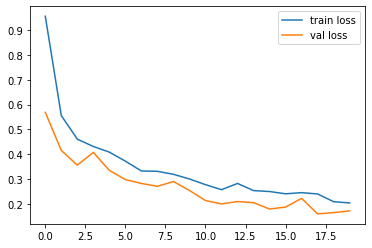

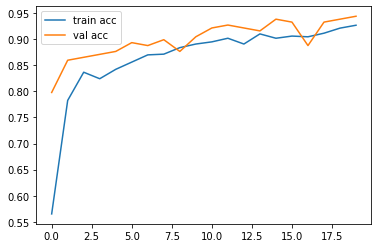

<Figure size 432x288 with 0 Axes>

In [11]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_3class.h5')

In [13]:
from tensorflow.keras.models import load_model

# load model
model = load_model('model_3class.h5')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [15]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:\\Users\\DELL\\Desktop\\Internship\\Image Scraping and Classification Project\\testsc\\saree\\s231.jpg'
                            ,target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [16]:
result=result.tolist()[0]
result

[0.03563995659351349, 0.9413325786590576, 0.02302739769220352]

In [17]:
if result.index(max(result))==0:
    print('the image classified is jeans')
elif result.index(max(result))==1:
    print('the image classified is saree')
else:
    print('the image classified is trouser')

the image classified is saree
